#AG2 - Actividad Guiada 2
Nombre: Raul Reyero <br>
Link:   https://colab.research.google.com/drive/xxxxxxxxxxxxxxxxxxxxxxxxx <br>
Github: https://github.com/Williams-MP/Algoritmos_de_optimizacion_entregas.git
<br>




In [2]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

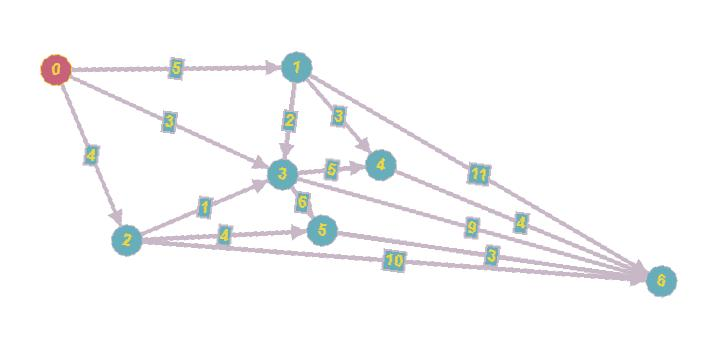

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [3]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [4]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [5]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [6]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

##Problema de Asignacion de tarea

In [7]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [8]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [9]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [10]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [11]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [12]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


##Descenso del gradiente

In [13]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [14]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

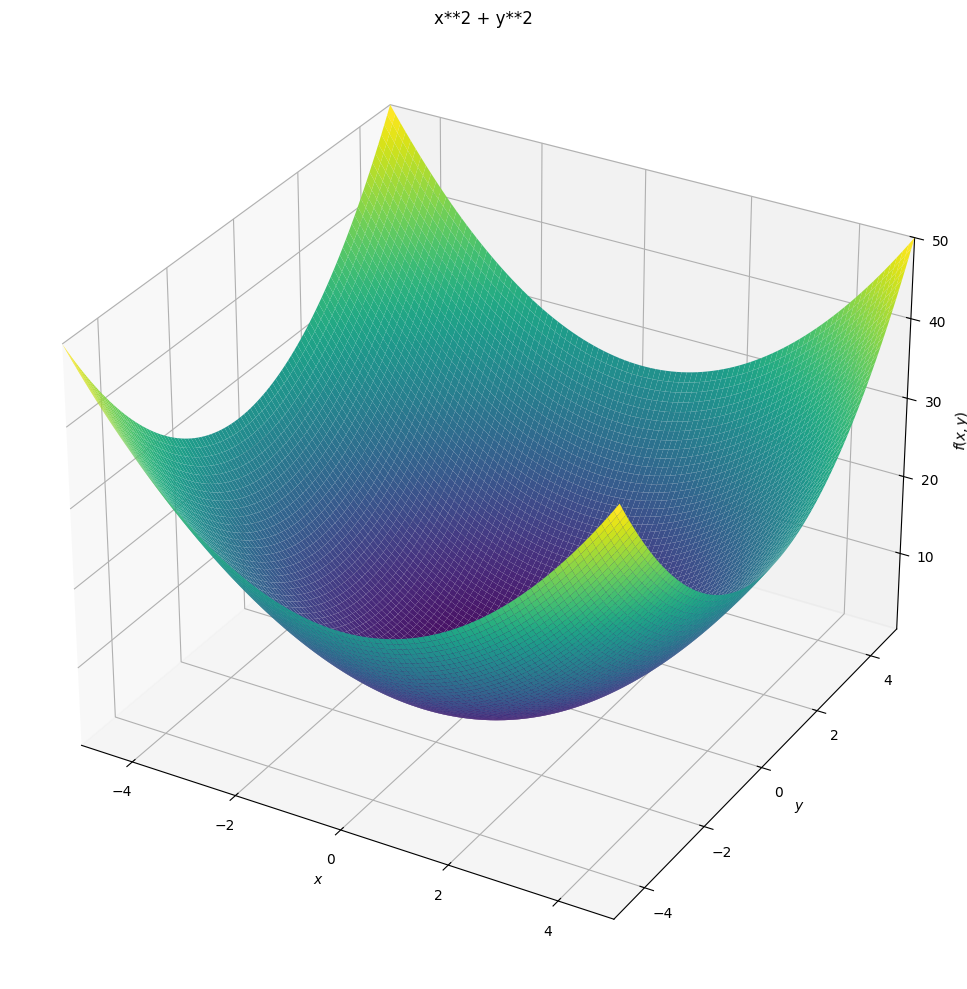

In [15]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

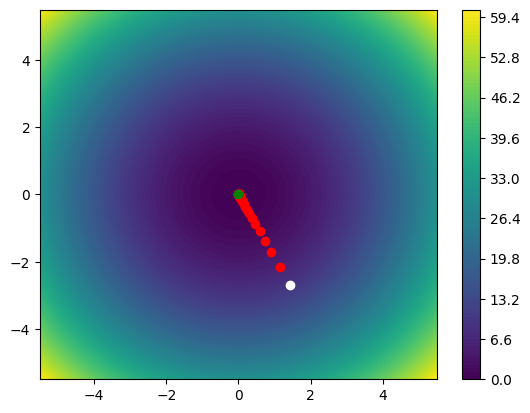

Solucion: [2.039997663051411e-05, -3.828135808794444e-05] 1.8816214235829507e-09


In [16]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
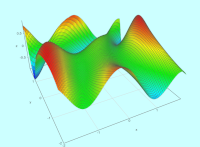


Para hacer este ejercicio, primero he tenido que investigar un poco apoyándome en la IA, porque con tanta información que estamos estudiando en el máster todavía estoy asimilando qué algoritmo es mejor para cada caso. Necesitaba ver claros los pros y contras de otros algoritmos para saber por donde ir. Al final, vi que para esta función, que tiene tantos baches y encima un término exponencial que puede hacer que el código haga crash, de acuerdo con las recomendaciones de Gemini el Recocido Simulado era la mejor opción. Me ha servido para entender que no siempre el algoritmo más rápido es el mejor si la función es muy complicada. He adjuntado una tabla con las comparaciones, y en base de hecho he adaptado el código de la AG3 aquí.

In [17]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


| Algoritmo | Pros (Lo bueno) | Contras (Lo malo) | Cuándo usarlo |
| :--- | :--- | :--- | :--- |
| **Descenso de Gradiente** | rápido y eficiente si la función es sencilla. | Si hay muchos baches nos quedamos en mínimos locales, sin poder salir. Necesitas derivadas. | Para funciones "limpias" y convexas (tipo cuenco) con un solo mínimo. |
| **Recocido Simulado** | Muy bueno para saltar fuera de los mínimos locales. No necesita derivadas ni que la función sea suave. | Tarda bastante porque hace muchas pruebas. Si no ajustas bien el enfriamiento, no funciona. | Para funciones con muchísimos valles y picos donde es fácil quedarse encerrado. |
| **Algoritmos Genéticos** | Mira en muchas zonas a la vez. Es muy difícil que se le escape el mínimo. | Consume mucha memoria y CPU porque gestiona muchos puntos a la vez. Configurar los cruces es complicado. | Cuando el mapa es un caos total y no tienes ni idea de por dónde empezar a buscar. |
| **Gradiente con Momento** | Como tiene "inercia" puede atravieser baches pequeños y zonas planas sin pararse. | No te asegura encontrar el mínimo global si el valle es muy profundo. | Al parecer se usa más entrenar Redes Neuronales y Deep Learning. |

Al adaptar el código que tenía al principio para esta función matemática, he tenido que retocar varias cosas para que no diera errores y fuera más eficiente:

- Formato de los datos: En el código original se hablaba de 'Nodos' y 'distancias' (usado en el TSP). Aquí lo he cambiado para que trabaje con coordenadas [x, y], que es lo que pide la función matemática del ejercicio.

- Cálculo de la función: He sustituido la función distancia_total por la f(x, y) que envuelve la lambda que nos han dado. Ahora, en lugar de buscar la distancia más corta entre nodos, se busca el valor más bajo de la superficie.

- Control del dominio con np.clip: Aquí he necesitado ayuda de la IA para evitar que los saltos no se salgan de rango a causa del exponencial. En el código base no había límites. Sin esto, el programa daría error de infinito al intentar calcular números demasiado grandes.

- Vectorización para el gráfico: He añadido la parte de np.vectorize al final. El código original solo imprimía el resultado por pantalla, pero parecía mejor meter un gráfico de curvas de nivel (contour plot) para ver de verdad cómo el algoritmo va saltando hasta llegar al mínimo. Aquí me he apoyado en la IA para saber como configurarlo.

- El criterio de probabilidad: He simplificado la llamada a la función de probabilidad metiendo el cálculo directamente en el if. Así el código queda más limpio y hace exactamente lo mismo que el seudocódigo: aceptar siempre lo mejor y solo a veces lo peor según la temperatura.

Punto óptimo encontrado: [np.float64(2.2064584427275804), np.float64(1.6876873667999832)]
Valor en ese punto: -0.9999345607246389


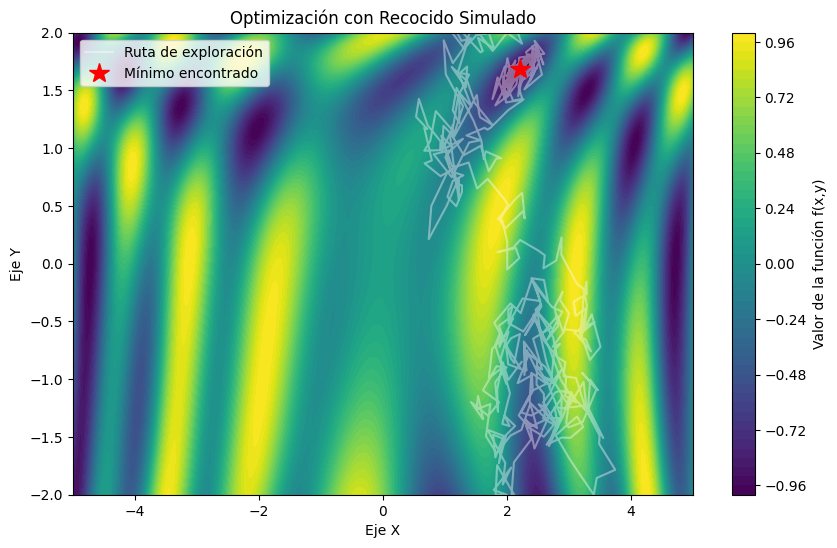

In [27]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Esta es la función exacta que nos han dado
funcion_lambda = lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))

# Definición de la función para que el algoritmo la use cómodamente
def f(x, y):
    # Metemos x e y en una lista para que la lambda la entienda
    return funcion_lambda([x, y])

# Función para moverse por el vecindario
def genera_vecina(solucion_actual, radio=0.3):
    x, y = solucion_actual
    
    # Le sumamos un valor aleatorio pequeño a x e y para tantear el terreno
    nuevo_x = x + random.uniform(-radio, radio)
    nuevo_y = y + random.uniform(-radio, radio)
    
    # Usamos np.clip para no salirnos de los límites que queremos estudiar
    # Pongo el límite de y en 2 para que el e^y no nos de un error de infinito
    nuevo_x = np.clip(nuevo_x, -5, 5)
    nuevo_y = np.clip(nuevo_y, -2, 2)
    
    return [nuevo_x, nuevo_y]

# Función del recocido simulado
def recocido_simulado(temp_inicial, enfriamiento):
    # Empezamos en un punto aleatorio cualquiera dentro de los límites
    punto_actual = [random.uniform(-4, 4), random.uniform(-2, 2)]
    valor_actual = f(punto_actual[0], punto_actual[1])

    # De momento, este es nuestro récord
    mejor_punto = punto_actual
    mejor_valor = valor_actual
    
    T = temp_inicial
    historial = [punto_actual]

    # El bucle para ir bajando la temperatura
    while T > 0.01:
        # Buscamos un vecino
        vecina = genera_vecina(punto_actual)
        valor_vecina = f(vecina[0], vecina[1])

        # Si el vecino es mejor que lo que teníamos antes, lo guardamos como récord
        if valor_vecina < mejor_valor:
            mejor_punto = vecina
            mejor_valor = valor_vecina

        # Calculamos la diferencia de "energía"
        delta = valor_vecina - valor_actual

        # Aquí está la clave: 
        # Si la vecina es mejor, nos movemos. 
        # Si es peor, a veces también nos movemos dependiendo de la temperatura
        if valor_vecina < valor_actual or random.random() < math.exp(-delta / T):
            punto_actual = vecina
            valor_actual = valor_vecina
            historial.append(punto_actual)

        # Enfriamos el sistema poco a poco
        T = T * enfriamiento

    return mejor_punto, mejor_valor, np.array(historial)

# Ejecutamos
TEMP = 20.0
FACTOR = 0.99 # Enfriamiento lento para que busque bien

mejor_sol, mejor_val, pasos = recocido_simulado(TEMP, FACTOR)

print(f"Punto óptimo encontrado: {mejor_sol}")
print(f"Valor en ese punto: {mejor_val}")

# Vialualizar
x_range = np.linspace(-5, 5, 400)
y_range = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_range, y_range)

# Vectorizamos f para que acepte las matrices X e Y de matplotlib
f_vec = np.vectorize(f)
Z = f_vec(X, Y)

plt.figure(figsize=(10, 6))
# Dibujamos el mapa de calor de la función
cp = plt.contourf(X, Y, Z, 50, cmap='viridis')
plt.colorbar(cp, label='Valor de la función f(x,y)')

# Pintamos el camino que ha seguido el algoritmo
plt.plot(pasos[:, 0], pasos[:, 1], 'w-', alpha=0.4, label='Ruta de exploración') 

# Marcamos el mejor punto con la estrella roja
plt.plot(mejor_sol[0], mejor_sol[1], 'r*', markersize=15, label='Mínimo encontrado') 

# Añadimos la leyenda y títulos
plt.title('Optimización con Recocido Simulado')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend(loc='upper left')
plt.show()

Parece que el recocido simulado ha sido una buena elección aquí, hemos evitado los mínmos locales. La IA me ha ayudado a ajustar el enfriamiento y los límites para que el código no petara por el exponencial, al final el algoritmo ha conseguido explorar bien el mapa y encontrar el mínimo global. Ver el recorrido en el gráfico de curvas de nivel me ha servido para entender de verdad cómo la temperatura ayuda a 'saltar' hacia las mejores soluciones.

- Prompt 1 (Gemini):

Hola, estoy haciendo una práctica de un máster y como todavía estoy asimilando mucha información de la asignatura, necesito que me expliques bien el código paso a paso. A continuación te pondré la función y quiero saber que posibilidades de algoritmos nos podrán ayudar aquí, ya que me imagino que el descenso de gradiente no funcionará aquí. Entendido?

- Prompt 2 (Gemini):

Ayúdame a retocar el código que ya tengo de base para que funcione con esta función lambda específica y que sea eficiente.

- Prompt 3 (Gemini):

Necesito que me a hacer modificacionesen partes del código del recocido para encontrar el mínimo global de la función.

- Prompt 4 (Gemini):

Podemos ver en la gráfica la ruta de los saltos de alguna manera?